# 1. Overview

The coronavirus pandemic has produced thousands of causalities and affected millions of people globally. Any technological device allowing accelerated screening of the COVID-19 infection with high accuracy can be crucially helpful to healthcare professionals.

According to Chowdhury et al. (2020),  X-ray imaging is an easily accessible tool that is used to diagnose COVID-19 cases. However, though regular Chest X-Ray (XCR) images may improve early screening of suspected cases, the images of various viral cases of pneumonia are similar. Therefore, it is difficult for radiologists to distinguish COVID-19 from other viral cases of pneumonia.

This database and ongoing research are performed to investigate the utility of artificial intelligence (AI) in the rapid and accurate detection of COVID-19 from chest X-ray images.

# 1.1 Content

In total, there are 21165 samples divided into four main classes:
* Covid-19
* Lung Opacity
* Normal
* Viral Pneumonia


All the images are in Portable Network Graphics (PNG) file format and the resolution are 299x299 pixels. On this current update, the database currently holds 3,616 COVID-19 positive cases, 10,192 Normal, 6,012 Lung Opacity (Non-COVID lung infection), and 1,345 Viral Pneumonia images.

# 1.2 Acknowledgments

The database creators acknowledge several institutions and researchers that have made the data collection possible. Please see [here](https://www.kaggle.com/tawsifurrahman/covid19-radiography-database) for the full list of colaborators.

### Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from glob import glob
from PIL import Image
import os
import random
import cv2
#Model
import keras
from keras.models import Sequential, Model,load_model
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPooling2D,MaxPool2D,AveragePooling2D,GlobalMaxPooling2D
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import BatchNormalization

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras import regularizers
from keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img
from keras.metrics import PrecisionAtRecall,Recall
#Model Analysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

from numpy.random import seed
seed(0)
import tensorflow
tensorflow.random.set_seed(0)


####Importing data





In [ ]:
import os
import os, os.path
os.environ['KAGGLE_USERNAME']="ho0ossammohammed1"
os.environ['KAGGLE_Key']="0ea35b065dbf574d7b433f72422b29dd"
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

 98% 764M/778M [00:07<00:00, 107MB/s] 
100% 778M/778M [00:08<00:00, 101MB/s]


In [ ]:
from zipfile import ZipFile

file_name="/content/covid19-radiography-database.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('extracted')

extracted


# Read images


In [ ]:
covid = glob('/content/COVID-19_Radiography_Dataset/COVID/images/*.png', recursive=True)
for filename in covid[0:10]:
    print(filename)
print(len(covid))

/content/COVID-19_Radiography_Dataset/COVID/images/COVID-2188.png
/content/COVID-19_Radiography_Dataset/COVID/images/COVID-3608.png
/content/COVID-19_Radiography_Dataset/COVID/images/COVID-3009.png
/content/COVID-19_Radiography_Dataset/COVID/images/COVID-883.png
/content/COVID-19_Radiography_Dataset/COVID/images/COVID-2268.png
/content/COVID-19_Radiography_Dataset/COVID/images/COVID-1107.png
/content/COVID-19_Radiography_Dataset/COVID/images/COVID-3518.png
/content/COVID-19_Radiography_Dataset/COVID/images/COVID-2879.png
/content/COVID-19_Radiography_Dataset/COVID/images/COVID-2628.png
/content/COVID-19_Radiography_Dataset/COVID/images/COVID-449.png
3616


In [ ]:
Lung_Opacity = glob('/content/COVID-19_Radiography_Dataset/Lung_Opacity/images/*.png', recursive=True)
for filename in Lung_Opacity[0:10]:
    print(filename)
print(len(Lung_Opacity))

/content/COVID-19_Radiography_Dataset/Lung_Opacity/images/Lung_Opacity-421.png
/content/COVID-19_Radiography_Dataset/Lung_Opacity/images/Lung_Opacity-5516.png
/content/COVID-19_Radiography_Dataset/Lung_Opacity/images/Lung_Opacity-1229.png
/content/COVID-19_Radiography_Dataset/Lung_Opacity/images/Lung_Opacity-4073.png
/content/COVID-19_Radiography_Dataset/Lung_Opacity/images/Lung_Opacity-3085.png
/content/COVID-19_Radiography_Dataset/Lung_Opacity/images/Lung_Opacity-759.png
/content/COVID-19_Radiography_Dataset/Lung_Opacity/images/Lung_Opacity-653.png
/content/COVID-19_Radiography_Dataset/Lung_Opacity/images/Lung_Opacity-1062.png
/content/COVID-19_Radiography_Dataset/Lung_Opacity/images/Lung_Opacity-5237.png
/content/COVID-19_Radiography_Dataset/Lung_Opacity/images/Lung_Opacity-4433.png
6012


In [ ]:
Normal = glob('/content/COVID-19_Radiography_Dataset/Normal/images/*.png', recursive=True)
for filename in Normal[0:10]:
    print(filename)
print(len(Normal))

/content/COVID-19_Radiography_Dataset/Normal/images/Normal-1802.png
/content/COVID-19_Radiography_Dataset/Normal/images/Normal-9147.png
/content/COVID-19_Radiography_Dataset/Normal/images/Normal-7164.png
/content/COVID-19_Radiography_Dataset/Normal/images/Normal-1335.png
/content/COVID-19_Radiography_Dataset/Normal/images/Normal-6561.png
/content/COVID-19_Radiography_Dataset/Normal/images/Normal-9396.png
/content/COVID-19_Radiography_Dataset/Normal/images/Normal-412.png
/content/COVID-19_Radiography_Dataset/Normal/images/Normal-6260.png
/content/COVID-19_Radiography_Dataset/Normal/images/Normal-5551.png
/content/COVID-19_Radiography_Dataset/Normal/images/Normal-3368.png
10192


In [ ]:
Viral_Pneumonia = glob('/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/*.png', recursive=True)
for filename in Viral_Pneumonia[0:10]:
    print(filename)
print(len(Viral_Pneumonia))

/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-955.png
/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-13.png
/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-768.png
/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-1272.png
/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-455.png
/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-480.png
/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-1095.png
/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-1332.png
/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-1201.png
/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-1268.png
1345


In [ ]:
# Initialize two lists to store image paths (X) and class labels (Y)
X = []  # List for image paths
Y = []  # List for class labels

# Iterate through the COVID-19 images
for i in range(len(covid)):
    # Append the current COVID-19 image path to the X list
    X.append(covid[i])

    # Append the class label "COVID-19" to the Y list
    Y.append("COVID-19")

# Now, X contains the paths of COVID-19 images, and Y contains the corresponding class labels


In [ ]:
# Iterate through the Lung Opacity images
for i in range(len(Lung_Opacity)):
    # Append the current Lung Opacity image path to the X list
    X.append(Lung_Opacity[i])

    # Append the class label "Lung_Opacity" to the Y list
    Y.append('Lung_Opacity')

# Now, X contains the paths of Lung Opacity images, and Y contains the corresponding class labels


In [ ]:
# Iterate through the Normal images
for i in range(len(Normal)):
    # Append the current Normal image path to the X list
    X.append(Normal[i])

    # Append the class label "Normal" to the Y list
    Y.append('Normal')

# Now, X contains the paths of Normal images, and Y contains the corresponding class labels


In [ ]:
# Iterate through the Viral_Pneumonia images
for i in range(len(Viral_Pneumonia)):
    # Append the current Viral_Pneumonia image path to the X list
    X.append(Viral_Pneumonia[i])

    # Append the class label "Viral_Pneumonia" to the Y list
    Y.append('Viral_Pneumonia')

# Now, X contains the paths of Viral_Pneumonia images, and Y contains the corresponding class labels


### Create a Pandas DataFrame

In [ ]:
covidData = pd.DataFrame()

# Add the 'Path' and 'Class' columns to the DataFrame
covidData['Path'] = X
covidData['Class'] = Y

# Shuffle the dataset to ensure randomness
covidData = covidData.sample(frac=1)

In [ ]:
covidData.head(10)

,Path,Class
3148,/content/COVID-19_Radiography_Dataset/COVID/im...,COVID-19
16357,/content/COVID-19_Radiography_Dataset/Normal/i...,Normal
11722,/content/COVID-19_Radiography_Dataset/Normal/i...,Normal
3176,/content/COVID-19_Radiography_Dataset/COVID/im...,COVID-19
9227,/content/COVID-19_Radiography_Dataset/Lung_Opa...,Lung_Opacity
20706,/content/COVID-19_Radiography_Dataset/Viral Pn...,Viral_Pneumonia
17081,/content/COVID-19_Radiography_Dataset/Normal/i...,Normal
13896,/content/COVID-19_Radiography_Dataset/Normal/i...,Normal
14800,/content/COVID-19_Radiography_Dataset/Normal/i...,Normal
19588,/content/COVID-19_Radiography_Dataset/Normal/i...,Normal


### Exploring the dataset

In [ ]:
covidData['Class'].unique()

array(['COVID-19', 'Normal', 'Lung_Opacity', 'Viral_Pneumonia'],
      dtype=object)

In [ ]:
covidData.shape

(21165, 2)

In [ ]:
samples,features = covidData.shape
duplicated = covidData.duplicated().sum()
null_values = covidData.isnull().sum().sum()
print('Basic EDA')
print('Number of samples: %d'%(samples))
print('Number of duplicated values: %d'%(duplicated))
print('Number of Null samples: %d' % (null_values))

Basic EDA
Number of samples: 21165
Number of duplicated values: 0
Number of Null samples: 0


Complementary information on Age, Gender or Weight of patients samples could be helpful to make the EDA more interesting. Not to mention, that additional information could be extremly important for the Machine Learning model.

* Healthy and Lung Opacity samples compose 80% of the dataset
* For this application, the main goal is to recognise Covid-19 patients. It will be interesting to see if the model will have greater difficulty in identifying Pneumonia or Covid samples
* Similar to other health conditions prediction problems or unbalanced datasets, it is necessary to prioritise Precision or Recall, since Accuracy can be misleading. The F1-Score is also a reasonable option

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
<h3>What we know so far</h3>
<ul>
<li>Our dataset contains a reasonable number of images
<li>No data cleansing is required
<li>Exploratory Data Analysis is done with regards to metadata, as we do not have additional information from the patients
<li>We can investigate image patterns and relantionships between the classes
<li>The data is unbalanced with almost 50% of samples belongs to <em>"Healthy"</em> class. The model will probably present better performance towards these samples
<li> Due to the Data Unbalance, it is best to use metrics such as <em>Precision</em>, <em>Recall</em> or <em>F1-Score</em> to measure model performance
<ul>
</blockquote>

## 2.1 Image Data EDA

In this section, an EDA on the image data is presented. Here it is investigated any patterns/relationships regarding the images and their respective classes.

First, let's have a look at a random sample and extract basic information regarding the images:

> Add images to DF

In [ ]:
covidData.head()

,Path,Class
3148,/content/COVID-19_Radiography_Dataset/COVID/im...,COVID-19
16357,/content/COVID-19_Radiography_Dataset/Normal/i...,Normal
11722,/content/COVID-19_Radiography_Dataset/Normal/i...,Normal
3176,/content/COVID-19_Radiography_Dataset/COVID/im...,COVID-19
9227,/content/COVID-19_Radiography_Dataset/Lung_Opa...,Lung_Opacity


In [ ]:
# Add a new column 'image' to the DataFrame, containing resized images
covidData['image'] = covidData['Path'].map(lambda x: np.asarray(Image.open(x).resize((299, 299))))


> Plot Samples

In [ ]:
covidData['image']

3148     [[77, 91, 91, 87, 88, 91, 98, 116, 125, 123, 1...
16357    [[10, 10, 7, 5, 3, 11, 17, 19, 25, 26, 29, 33,...
11722    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
3176     [[22, 22, 22, 22, 22, 21, 20, 21, 21, 25, 24, ...
9227     [[0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,...
                               ...                        
13123    [[16, 14, 14, 15, 14, 13, 13, 11, 11, 9, 10, 1...
19648    [[8, 4, 3, 3, 6, 10, 12, 15, 18, 20, 23, 27, 3...
9845     [[16, 12, 8, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, ...
10799    [[12, 10, 9, 9, 8, 9, 8, 10, 12, 16, 19, 22, 2...
2732     [[67, 51, 35, 23, 11, 3, 1, 0, 0, 0, 0, 0, 0, ...
Name: image, Length: 21165, dtype: object

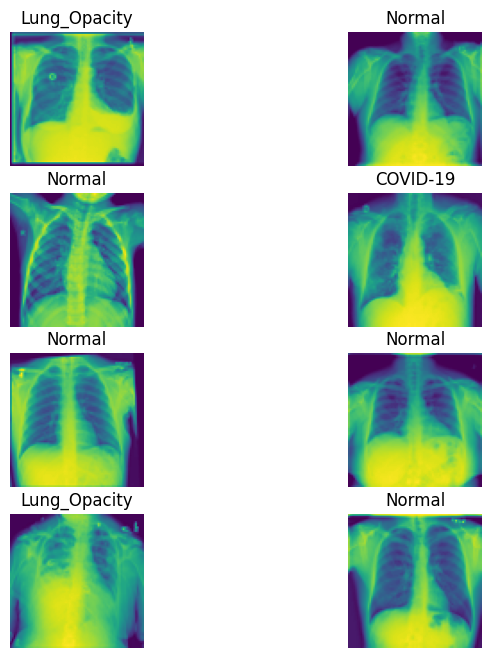

In [ ]:

# Choose a random sample of images to display
sample = covidData.sample(n=8, random_state=15)

# Create a figure with a 3x2 grid of subplots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(8, 8))

# Loop over each subplot and display an image with its class
for i, ax in enumerate(axs.flat):
    # Load the image using Pillow
    img = sample.iloc[i]['image']
    #img = Image.open(img_path)

    # Display the image and its class
    ax.imshow(img)
    ax.set_title(sample.iloc[i]['Class'])
    ax.axis('off')
    #plt.subplots(3)

plt.show()

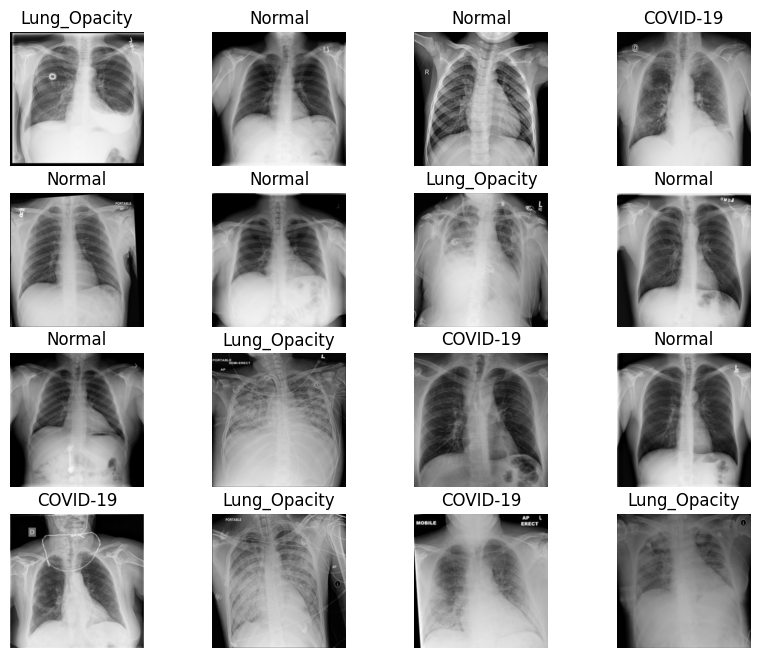

In [ ]:
# Create a figure with subplots to display the images
fig, axs = plt.subplots(4, 4, figsize=(10, 8))

# Select a random sample of images from your dataset
sample = covidData.sample(n=16, random_state=15)

# Loop over the subplots and plot each image with its class label
for i, ax in enumerate(axs.flat):
    img_path, img_class = sample.iloc[i]['Path'], sample.iloc[i]['Class']
    img_array = cv2.imread(img_path)
    ax.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    ax.set_title(img_class)
    ax.axis('off')

# Display the plot
plt.show()

In an RGB image, every pixel is denoted by three 8-bit values corresponding to the Red, Green, and Blue color channels. These values, ranging from 0 to 255, determine the intensity of each channel for a particular pixel. The dataset provides images in the PNG format, and by utilizing the cv2 library, the images are accurately rendered in their true colors.

In [ ]:
img=covidData['Path'][0]
img_array=cv2.imread(img)
img , img_array , img_array.shape

('/content/COVID-19_Radiography_Dataset/COVID/images/COVID-2188.png',
 array([[[221, 221, 221],
         [249, 249, 249],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [249, 249, 249],
         [221, 221, 221]],
 
        [[222, 222, 222],
         [249, 249, 249],
         [231, 231, 231],
         ...,
         [255, 255, 255],
         [249, 249, 249],
         [221, 221, 221]],
 
        [[225, 225, 225],
         [222, 222, 222],
         [175, 175, 175],
         ...,
         [255, 255, 255],
         [250, 250, 250],
         [221, 221, 221]],
 
        ...,
 
        [[194, 194, 194],
         [ 43,  43,  43],
         [  0,   0,   0],
         ...,
         [ 40,  40,  40],
         [158, 158, 158],
         [233, 233, 233]],
 
        [[218, 218, 218],
         [ 71,  71,  71],
         [  6,   6,   6],
         ...,
         [ 64,  64,  64],
         [205, 205, 205],
         [229, 229, 229]],
 
        [[231, 231, 231],
         [106, 106, 106]

>Checking the image basic parameters

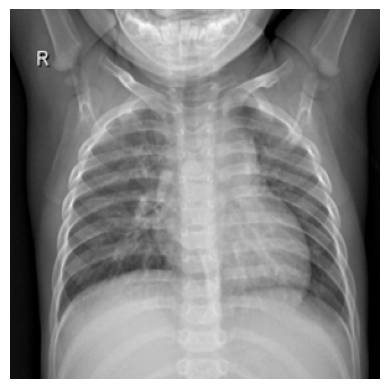

In [ ]:
plt.figure()
pic_id = random.randrange(0, samples)
picture = covidData['Path'][pic_id]
image = cv2.imread(picture)
plt.imshow(image)
plt.axis('off');
plt.show()

In [ ]:
print('Shape of the image : {}'.format(image))
print('Image Hight {}'.format(image.shape[0]))
print('Image Width {}'.format(image.shape[1]))
print('Dimension of Image {}'.format(image.ndim))
print('Image size {}'.format(image.size))
print('Image Data Type {}'.format(image.dtype))
print('Maximum RGB value in this image {}'.format(image.max()))
print('Minimum RGB value in this image {}'.format(image.min()))

Shape of the image : [[[55 55 55]
  [57 57 57]
  [61 61 61]
  ...
  [65 65 65]
  [62 62 62]
  [61 61 61]]

 [[56 56 56]
  [57 57 57]
  [60 60 60]
  ...
  [63 63 63]
  [61 61 61]
  [59 59 59]]

 [[57 57 57]
  [56 56 56]
  [57 57 57]
  ...
  [63 63 63]
  [61 61 61]
  [59 59 59]]

 ...

 [[16 16 16]
  [16 16 16]
  [15 15 15]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[15 15 15]
  [16 16 16]
  [15 15 15]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[14 14 14]
  [15 15 15]
  [16 16 16]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]
Image Hight 299
Image Width 299
Dimension of Image 3
Image size 268203
Image Data Type uint8
Maximum RGB value in this image 252
Minimum RGB value in this image 0


Even though the images are in greyscale, they present the three channels.

The output below is an unique pixel of the **image array at [0,0]**, we see that all colour channels have the same value.
>As a side note, OpenCV assumes the image to be Blue-Green-Red (BGR), not RGB.

As it was shown so far, the images are nothing more than an array of numbers in a format [Height, Width, Channel]. With that in mind, we proceed with our EDA.

Here we start to examine if there is any pattern between the image colour values and their class. A distribution plot illustrates how the mean, max and min colour values are presented for the dataset.

In [ ]:
# Calculate mean, standard deviation, maximum, and minimum values for each image
mean_val = [covidData['image'][i].mean() for i in range(samples)]
std_dev_val = [np.std(covidData['image'][i]) for i in range(samples)]
max_val = [covidData['image'][i].max() for i in range(samples)]
min_val = [covidData['image'][i].min() for i in range(samples)]

# Create a DataFrame for image exploratory data analysis (EDA)
imageEDA = covidData.loc[:, ['image', 'Class', 'Path']]
imageEDA['mean'] = mean_val
imageEDA['std_dev'] = std_dev_val
imageEDA['max'] = max_val
imageEDA['min'] = min_val

# Calculate the difference between the mean of mean values and individual mean values
subt_mean_samples = imageEDA['mean'].mean() - imageEDA['mean']
imageEDA['subt_mean'] = subt_mean_samples


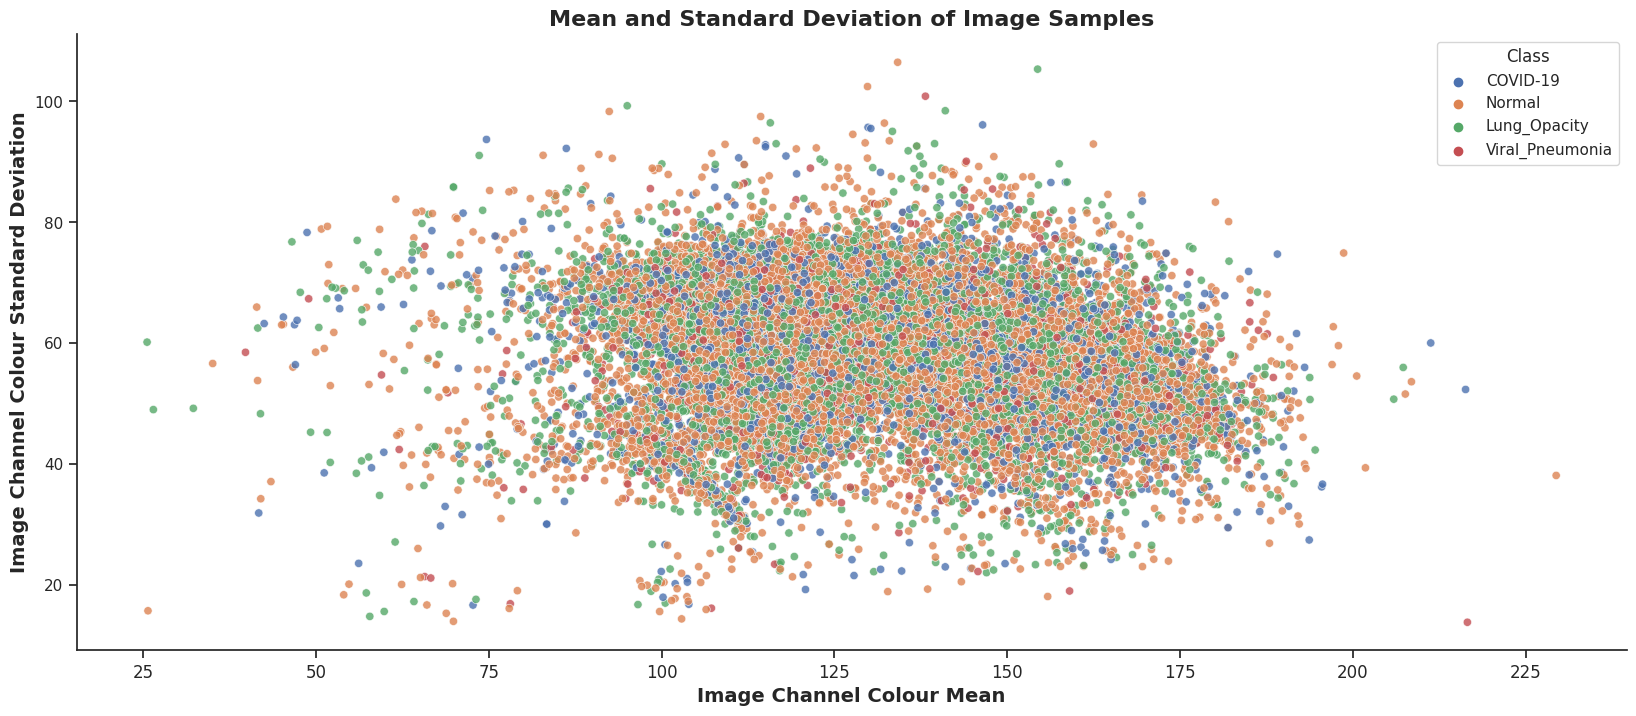

In [ ]:
plt.figure(figsize=(20,8))
sns.set(style="ticks", font_scale = 1)
ax = sns.scatterplot(data=imageEDA, x="mean", y=imageEDA['stedev'], hue = 'Class',alpha=0.8);
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=0,fontsize = 12)
ax.set_xlabel('Image Channel Colour Mean',fontsize = 14,weight = 'bold')
ax.set_ylabel('Image Channel Colour Standard Deviation',fontsize = 14,weight = 'bold')
plt.title('Mean and Standard Deviation of Image Samples', fontsize = 16,weight = 'bold');

The mean and standard deviation of a sample of images can provide useful information about the distribution of pixel values within the images.

The mean of the sample represents the average pixel value across all the images. A high mean would suggest that the images have generally brighter pixels, while a low mean would suggest that the images have generally darker pixels.

The standard deviation of the sample represents the amount of variation or spread in the pixel values across the images. A high standard deviation would suggest that the images have a wide range of pixel values, while a low standard deviation would suggest that the images have a narrow range of pixel values.

Together, the mean and standard deviation can give an indication of the brightness and contrast of the images in the sample. Additionally, this information can be used to normalize or standardize the pixel values across the sample, which can be useful in machine learning tasks such as image classification and object detection.

* Most images are gathered in the central region of the scatter plot, i.e. there is not much contrast between their pixel values
* Covid-19 samples seem to be the only class to have a small cluster of data on the bottom left side of the plot, where samples with a lower mean and low standard variation lie
* An individual plot by class is required, as the classes are on top of each other and we might miss important details
* We see that all classes have outliers spread around the peripheric area of the graph. It will be interesting to use visualisation to understand how the outliers look like

The plot above is crowded, let's analyse by class separately:

<Figure size 2000x800 with 0 Axes>

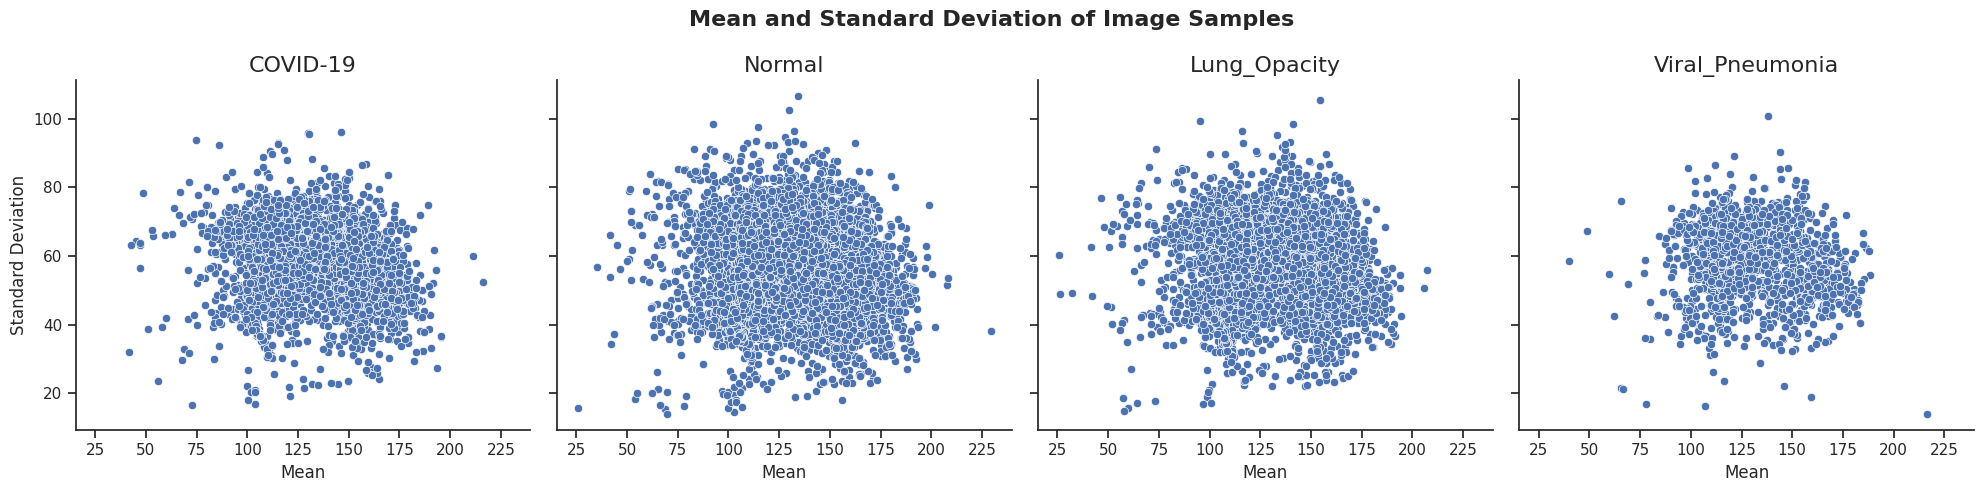

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot for mean and standard deviation of image samples
plt.figure(figsize=(20, 8))
g = sns.FacetGrid(imageEDA, col="Class", height=5)
g.map_dataframe(sns.scatterplot, x='mean', y='std_dev')
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=16)
g.fig.subplots_adjust(top=.7)
g.fig.suptitle('Mean and Standard Deviation of Image Samples', fontsize=16, weight='bold')
axes = g.axes.flatten()
axes[0].set_ylabel('Standard Deviation')

# Set labels for x-axis and y-axis
for ax in axes:
    ax.set_xlabel('Mean')

# Adjust layout for better visualization
g.fig.tight_layout()

* The Normal (Healthy) samples and Lung Opacity images have a similar scatter, with most of its outliers with higher standard deviation and lower mean values
* Viral Pneumonia images display a more concentrated scatter, perhaps these images have higher similarity to each other than compared to the other classes
* The Covid-19 scatter does not resemble any of the other three classes. It presents more outliers than the other classes, and the points are more scattered across the graph. It could indicate that the images have a higher distinction between each other

The visualisation below was inspired by a talk at [PyData 2016](https://www.youtube.com/watch?v=GIVK0-SNUgU), by Mehrdad Yazdani with the title *Using Exploratory Data Analysis to Discover Patterns*. It really helps to make things clearer to see the images data into a chart format. The dots location of the scatter plot above are used as reference for the image locations.

>Due to the time it takes to load, 10% of data is used for the visualisation.

* Even though we could use our imagination to understand what it meant to have high or low mean values, the visualisation above really helps to grasp the concept. Following the X-Axis, the images have a crescent brightness increase as they present higher mean values
* Higher standard deviations are linked to images with high contrast and a more dominant black background
* The outliers at low standard deviation and near the 75 are from Covid-19. It seems like a little data cluster at that region
* More insights could be available by performing the plot by class

# 3. CNN Model

Basic considerations regarding the CNN model used:
* Use ImageDataGenerator for Data Augmentation and organise the files into training and validation set
* train and test_datagen have different settings. Ideally, we should not augment the validation set
* test_datagen hyperparameter **shuffle=False** makes sure the training and validation data do not overlap
* I used a CNN architecture that has consistently provided me reasonable results as a starting point
* The Model predicts the Four types of X-Ray Images
* Confusion Matrix, Accuracy, Precision, Recall and F-Score are analysed for final remarks

>ImageDataGenerator settings

In [ ]:
from sklearn.model_selection import train_test_split
datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images by up to 10 degrees
    zoom_range=0.1,  # randomly zoom images by up to 10%
    horizontal_flip=True,  # randomly flip images horizontally
    brightness_range=(0.9, 1.1),  # randomly adjust brightness by up to 10%
    rescale=1./255  # rescale pixel values to range [0,1]
)
train_data, test_data = train_test_split(covidData, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Create data generators
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.9, 1.1),
    rescale=1./255
)

# Create data iterators using the data generators
batch_size = 64
train_iterator = datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='Path',
    y_col='Class',
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)
val_iterator = datagen.flow_from_dataframe(
    dataframe=val_data,
    x_col='Path',
    y_col='Class',
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
test_iterator = datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='Path',
    y_col='Class',
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 13545 validated image filenames belonging to 4 classes.
Found 3387 validated image filenames belonging to 4 classes.
Found 4233 validated image filenames belonging to 4 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(299,299,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(4, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(train_iterator, steps_per_epoch=len(train_iterator), epochs=25,validation_data=val_iterator,verbose=1)



Epoch 1/25
212/212 [==============================] - 423s 2s/step - loss: 0.9175 - accuracy: 0.6283 - val_loss: 0.6954 - val_accuracy: 0.7319
Epoch 2/25
212/212 [==============================] - 393s 2s/step - loss: 0.6596 - accuracy: 0.7357 - val_loss: 0.6563 - val_accuracy: 0.7375
Epoch 3/25
212/212 [==============================] - 395s 2s/step - loss: 0.5719 - accuracy: 0.7764 - val_loss: 0.5252 - val_accuracy: 0.8001
Epoch 4/25
212/212 [==============================] - 393s 2s/step - loss: 0.5224 - accuracy: 0.7984 - val_loss: 0.4636 - val_accuracy: 0.8246
Epoch 5/25
212/212 [==============================] - 392s 2s/step - loss: 0.4741 - accuracy: 0.8190 - val_loss: 0.4580 - val_accuracy: 0.8258
Epoch 6/25
212/212 [==============================] - 394s 2s/step - loss: 0.4266 - accuracy: 0.8376 - val_loss: 0.4276 - val_accuracy: 0.8370
Epoch 7/25
212/212 [==============================] - 393s 2s/step - loss: 0.4055 - accuracy: 0.8493 - val_loss: 0.4077 - val_accuracy: 0.8438

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_iterator, steps=len(test_iterator))
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

67/67 [==============================] - 114s 2s/step - loss: 0.2984 - accuracy: 0.8989
Test loss: 0.2983577847480774
Test accuracy: 0.8988896608352661


In [ ]:
y_pred=model.predict(test_iterator)

67/67 [==============================] - 97s 1s/step


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


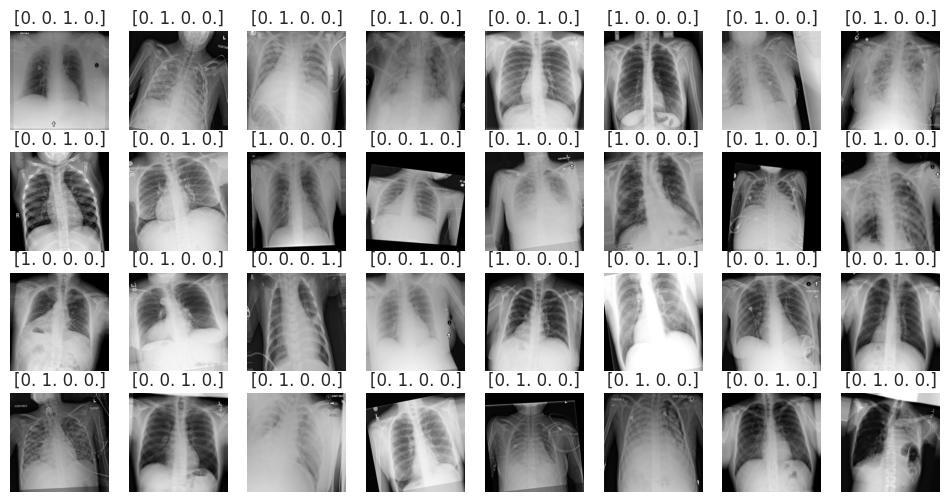

In [ ]:
batch_images, batch_labels = train_iterator.next()

# Plot a grid of images
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(batch_images[i])
    ax.set_title(batch_labels[i])
    ax.axis('off')
plt.show()

In [ ]:
class_labels = train_iterator.class_indices
class_labels

{'COVID-19': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Viral_Pneumonia': 3}

In [ ]:
import matplotlib.pyplot as plt

def plot_training_curves(history):
    # Get training history
    training_loss = history.history['loss']
    training_acc = history.history['accuracy']

    # Get validation history
    validation_loss = history.history['val_loss']
    validation_acc = history.history['val_accuracy']

    # Plot the curves
    epochs = range(1, len(training_loss) + 1)

    plt.figure(figsize=(12, 4))

    # Plot the loss curves
    plt.subplot(1, 2, 1)
    plt.plot(epochs, training_loss, 'b-', label='Training Loss')
    plt.plot(epochs, validation_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot the accuracy curves
    plt.subplot(1, 2, 2)
    plt.plot(epochs, training_acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, validation_acc, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

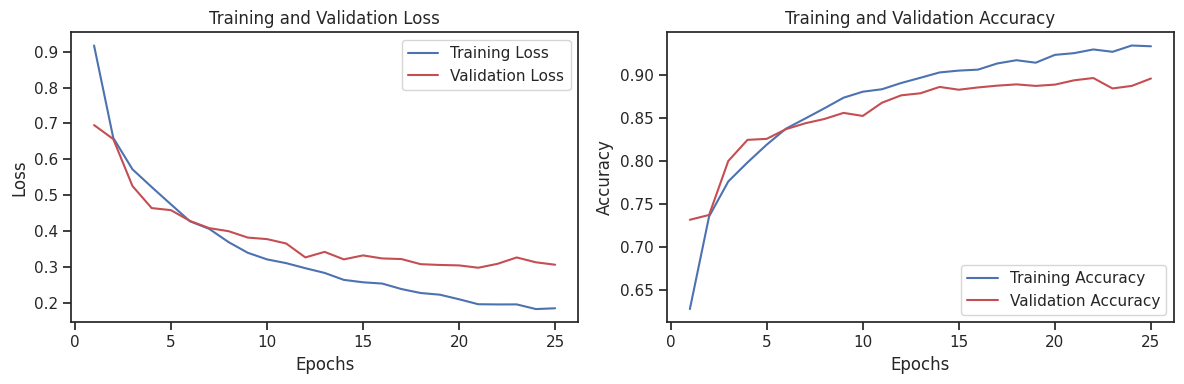

In [ ]:
plot_training_curves(history)

##	Training and Validation Line in Graph: The training and validation lines closely follow each other, indicating good generalization.
This model shows promising results with a simple architecture. It achieves a high overall accuracy, and the loss consistently decreases throughout the training process. The convergence is observed early on, suggesting efficient learning. Additionally, the absence of overfitting is a positive sign, as the training and validation performance align closely on the graph.


>CNN Architecture

Preliminary tests have shown that model performance was very much impacted by the batch size, more than by the learning rate or optimiser used.

Batch size is the number of samples processed before the model is updated. Larger batch sizes (32,64,128) provided a lower test set accuracy regardless of the number of epochs. A smaller batch than 16 took longer to train and yielded similar results.

The validation performance oscillates heavily in the initial epochs, i.e. from 0.00 to 90% in the following epoch. As the Learning Rate was already low, reducing it was not helpful and neither callbacks improved this behaviour. Perhaps, when using 'SGD' as an optimiser I can play with Learning Rate Scheduling. 'Adam' already has that functionality built-in.

Even though I did not use any optimised hyperparameters tuning, the batch_size with a lower learning rate of 0,001 provided satisfactory results.

> Model settings and training

Below is the Model performance during training:

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
<h3>What we know so far</h3>
<ul>
<li>Peaks and Valleys of the initial training phase indicate several local optima the model has encountered
<li>There is no expressive gain in Model Accuracy Metric after 60 epochs, as we see that the loss for the validation set stabilises after that
<li>Training the model for longer could lead to Overfitting
<li>Training the model for fewer epochs, we would be probably stuck in a Local Optima and fail to generalise to new samples
<li>There is a clear link between the Learning Rate reduction and the model being able to converge to a more stable solution  
<ul>
</blockquote>

# 4. Results and Conclusion

The results are analysed in terms of F1-Score, as Precision and Recall are both relevant metrics for this application.

To provide a general overview of the Model performance, the confusion matrix and results for the F1-Score, Precision, Recall and overall Accuracy is also presented.

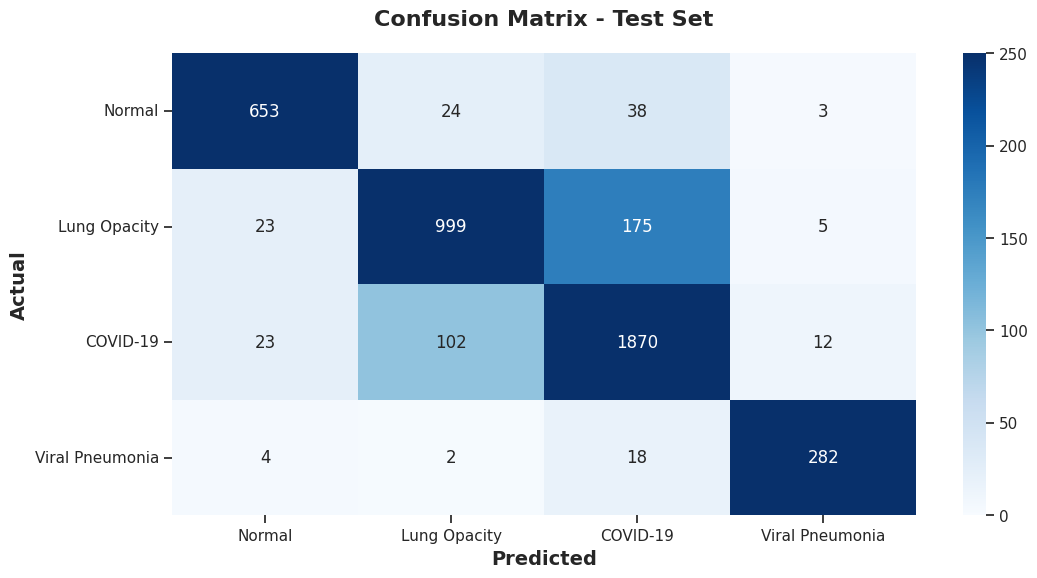

In [ ]:
# Transform the predictions into an array such as [0, 0, 1, 2, ...]
predictions = np.array(list(map(lambda x: np.argmax(x), y_pred)))
# Retrieve the true classes of the test set
y_true = test_iterator.labels
# Build Confusion Matrix
classes = ["Normal", "Lung Opacity", "COVID-19", "Viral Pneumonia"]
CMatrix = pd.DataFrame(confusion_matrix(y_true, predictions), columns=classes, index=classes)

plt.figure(figsize=(12, 6))

ax = sns.heatmap(CMatrix, annot=True, fmt='g', vmin=0, vmax=250, cmap='Blues')
ax.set_xlabel('Predicted', fontsize=14, weight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

ax.set_ylabel('Actual', fontsize=14, weight='bold')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_title('Confusion Matrix - Test Set', fontsize=16, weight='bold', pad=20)

plt.show()

keras.backend.clear_session()

* Overall, the model can identify the samples, i.e. there is a good amount of TP
* Covid-19, if misclassified, can be predicted as Normal or Lung Opacity samples. Not likely to be classified as Viral Pneumonia
* Lung Opacity is more often misclassified as Normal than as Viral Pneumonia or Lung Opacity
* Normal samples are usually misclassified as Viral Pneumonia or Lung Opacity. Less common to be mistaken for Covid-19
* Viral Pneumonia is the class with the fewer number of misclassifications

In [ ]:
y_pred

array([[9.7856742e-01, 2.0238753e-02, 1.0962633e-03, 9.7537522e-05],
       [5.9850612e-03, 3.7783018e-04, 1.2329001e-04, 9.9351382e-01],
       [1.6313368e-05, 5.4430843e-06, 2.1258392e-03, 9.9785244e-01],
       ...,
       [2.4142700e-04, 2.5154319e-05, 9.9962032e-01, 1.1312952e-04],
       [5.5197934e-12, 8.0899175e-05, 9.9991906e-01, 6.4522379e-18],
       [1.5341127e-04, 9.9940073e-01, 4.4455926e-04, 1.2391413e-06]],
      dtype=float32)

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_true, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       718
           1       0.89      0.83      0.86      1202
           2       0.89      0.93      0.91      2007
           3       0.93      0.92      0.93       306

    accuracy                           0.90      4233
   macro avg       0.91      0.90      0.90      4233
weighted avg       0.90      0.90      0.90      4233



**Overall Results**
Accuracy Result: 89.87%
Precision Result: 90.98%
Recall Result: 89.85%
F-Score Result: 90.38%


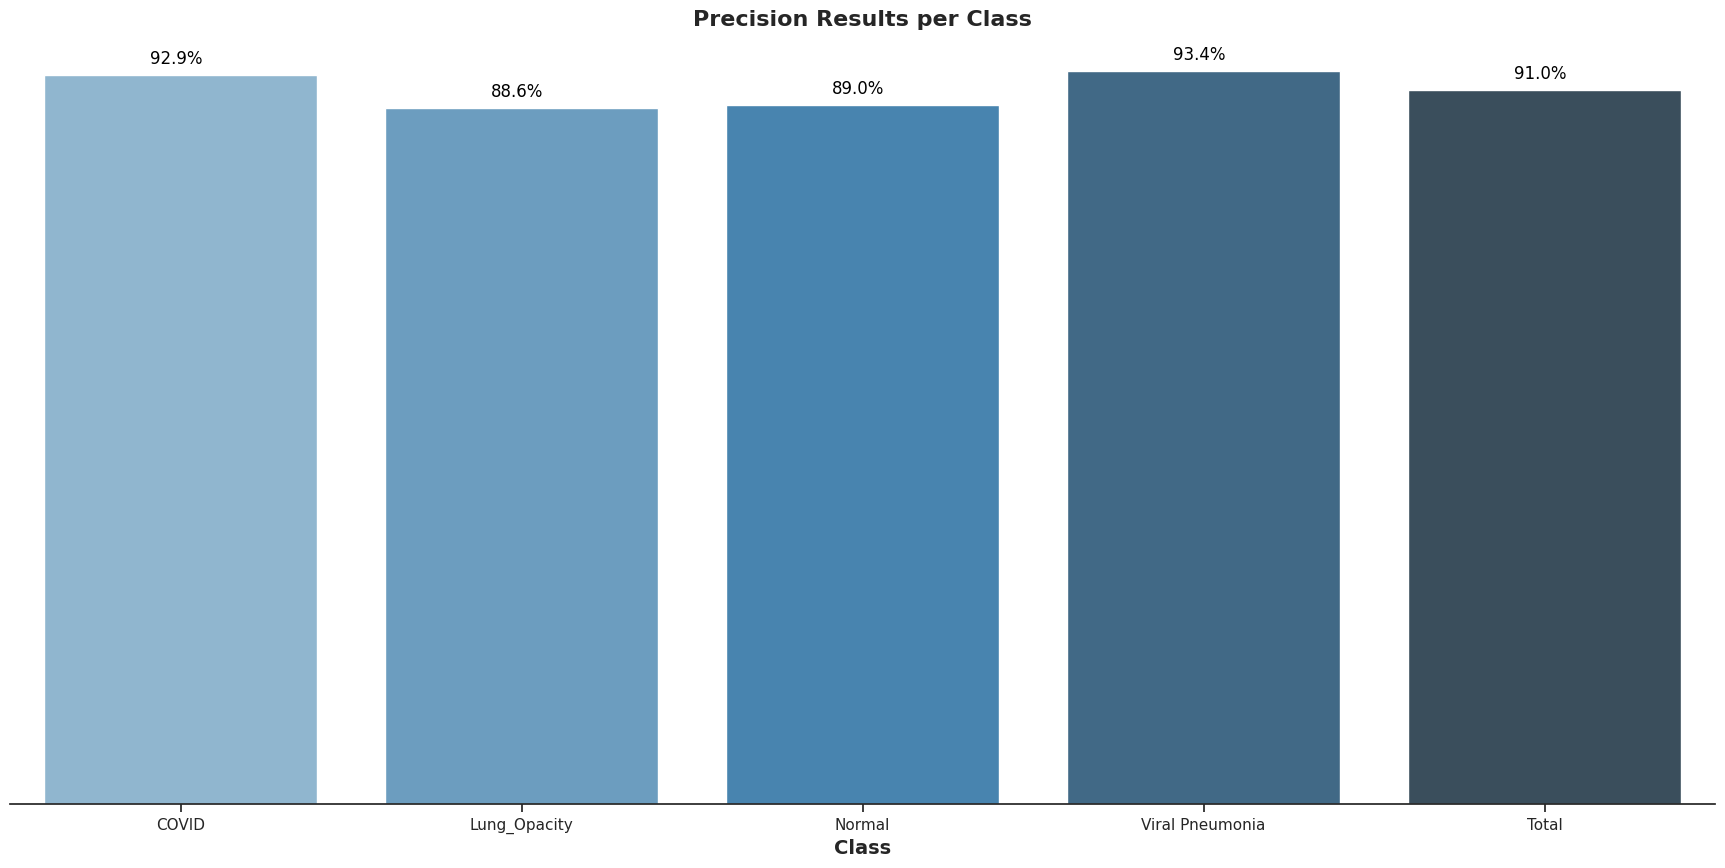

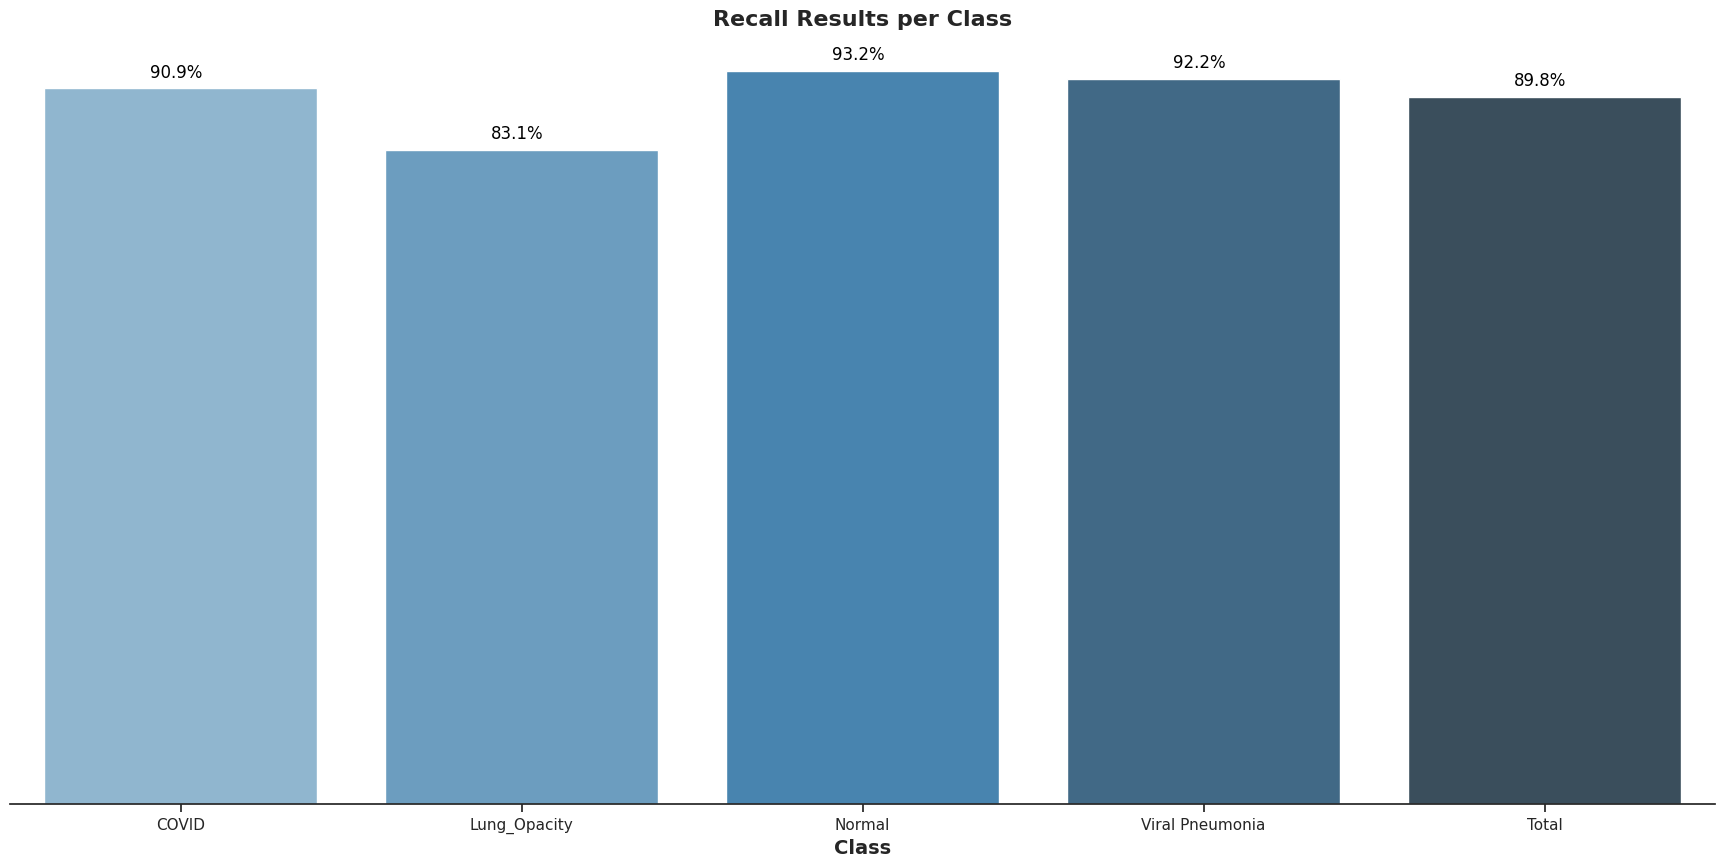

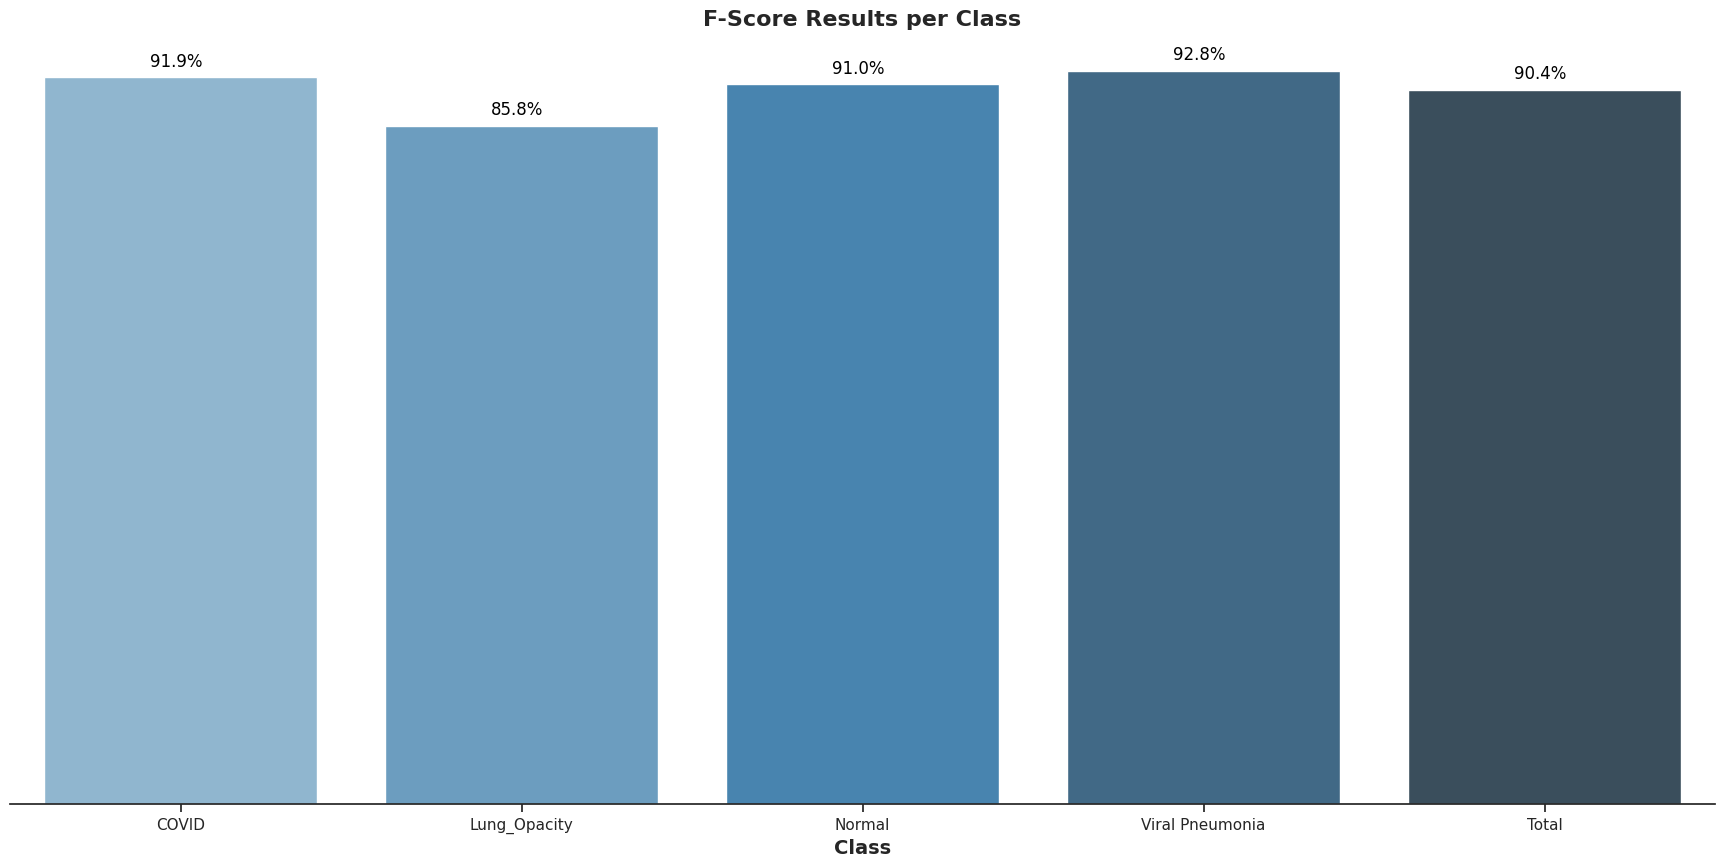

In [ ]:
#Accuracy Result
acc = accuracy_score(y_true, predictions)
#Precision, Recall and F-Score (For the whole dataset)
results_all = precision_recall_fscore_support(y_true, predictions, average='macro',zero_division = 1)
#Precision, Recall and F-Score (For each Class)
results_class = precision_recall_fscore_support(y_true, predictions, average=None, zero_division = 1)

#Organise the Results into a Dataframe
metric_columns = ['Precision','Recall', 'F-Score','S']
all_df = pd.concat([pd.DataFrame(list(results_class)).T,pd.DataFrame(list(results_all)).T])
all_df.columns = metric_columns
all_df.index = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia','Total']

#Function to plot the metrics into a nice bar Plot
def metrics_plot(df,metric):
    plt.figure(figsize=(22,10))
    ax = sns.barplot(data =df, x=df.index, y = metric,palette = "Blues_d")
    #Bar Labels
    for p in ax.patches:
        ax.annotate("%.1f%%" % (100*p.get_height()), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
        ha='center', va='bottom', color='black', xytext=(-3, 5),rotation = 'horizontal',textcoords='offset points')
    sns.despine(top=True, right=True, left=True, bottom=False)
    ax.set_xlabel('Class',fontsize = 14,weight = 'bold')
    ax.set_ylabel(metric,fontsize = 14,weight = 'bold')
    ax.set(yticklabels=[])
    ax.axes.get_yaxis().set_visible(False)
    plt.title(metric+ ' Results per Class', fontsize = 16,weight = 'bold');

metrics_plot(all_df, 'Precision')#Results by Class
metrics_plot(all_df, 'Recall')#Results by Class
metrics_plot(all_df, 'F-Score')#Results by Class
print('**Overall Results**')
print('Accuracy Result: %.2f%%'%(acc*100)) #Accuracy of the whole Dataset
print('Precision Result: %.2f%%'%(all_df.iloc[4,0]*100))#Precision of the whole Dataset
print('Recall Result: %.2f%%'%(all_df.iloc[4,1]*100))#Recall of the whole Dataset
print('F-Score Result: %.2f%%'%(all_df.iloc[4,2]*100))#F-Score of the whole Dataset


<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
<h3>What we achieved so far</h3>
<ul>
<li>Covid class presents ~ 93% Precision and ~90% Recall. The result means that the model is not capable of classifying all the Covid-19 samples correctly (low Recall - high FN). However, it is usually correct when it does so (high precision - low FP)
<li>Normal and Viral Pneumonia class present the opposite result we see in Covid-19. They have a higher Recall than Precision. This means that the model is good at recognising these samples, i.e. lower number of FN. However, it is producing FP, i.e. as we saw in the Confusion Matrix where Normal class is usually mistaken by Viral Pneumonia or Lung Opacity.
<li>The F-Score is the balance between Precision and Recall. As expected, the Normal class show a high score as the Precision and Recall metrics are similar. Lower results are found for Covid, as the Precision and Recall metrics differed more intensely.
<li>Overall, it is a good outcome that all the general metrics are above 85%. Results per class should definetly be improved, especially to reduce the number of COVID samples wrongly classified as NORMAL samples
<ul>
</blockquote>

### Saving model

In [ ]:
import torch
# Save the model's state dictionary
torch.save(model, 'model.pt')
